<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# DSI-SG-42 Project 4
## In A Heartbeat: Prediction of Heart Disease Risk for Early Detection

---

## 2C. Exploratory Data Analysis - Before and After Imputation

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme of visualizations to ggplot
plt.style.use('ggplot')


# setting displays
%matplotlib inline
pd.set_option('display.width', 100000)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# import dataset
no_null_df = pd.read_csv('../data/heart_drop_null_data.csv')


print(no_null_df.head()) # inspect dataset

    age  height  weight    bmi  yrssmok  packday  sleep_hours health_status phys_health_not_good mental_health_not_good last_routine_checkup visit_dentist_past_year health_insurance phy_exercise_past_30_days stroke cancer kidney_disease colon_sigmoidoscopy chd_mi asthma_status race_ethnicity     sex                     education  smoker_status e_cig_smoker binge_drinker heavy_drinker income_groups
0  68.0    1.60   71.67  28.00      0.0      0.0          9.0     Very Good            1-13 days                 0 days     Within past year                      No              Yes                       Yes     No     No             No                 Yes     No         Never          White  Female  Attended College or Tech Sch  Former smoker           No            No            No     100K-150K
1  71.0    1.78   95.25  30.06      0.0      0.0          6.0     Very Good               0 days                 0 days     Within past year                      No              Yes                 

#### 2C.1 Cleaning the imputed dataframe

As we have imputed the dataset previously, we will have to use the same steps that we did with the dataset that we had drop all the null values.

In [ ]:
# import imputed dataset
imputed_df = pd.read_csv('../data/final_dataset.csv')
print(imputed_df.head())

    age  height  weight     bmi  yrssmok  packday  sleep_hours  chd_mi  health_status  phys_health_not_good  mental_health_not_good  last_routine_checkup  visit_dentist_past_year  health_insurance  phy_exercise_past_30_days  stroke  cancer  kidney_disease  colon_sigmoidoscopy  asthma_status  race_ethnicity  sex  education  income  smoker_status  e_cig_smoker  binge_drinker  heavy_drinker
0  80.0   1.614  72.664  26.888      0.0      0.0          8.0     2.0            2.0                   1.0                     1.0                   1.0                      1.0               1.0                        2.0     2.0     2.0             2.0                  1.0            3.0             1.0  2.0        4.0     7.0            4.0           1.0            1.0            1.0
1  80.0   1.600  68.040  26.580      0.0      0.0          6.0     2.0            1.0                   1.0                     1.0                   8.0                      1.0               1.0                      

In [ ]:
# Reordering the dataframe

# subset variables that are numerical
df_numeric = imputed_df[['age', 'height', 'weight', 'bmi', 'yrssmok','packday', 'sleep_hours']]

# Filter the DataFrame to include only non-numeric columns
df_cat = imputed_df.drop(columns = ['age', 'height', 'weight', 'bmi', 'yrssmok','packday',  'sleep_hours'])

In [ ]:
# convert categorical from original dtype of float to object
def to_string(dataframe, col):
    dataframe[col] = dataframe[col].astype(str) # convert to string
    return dataframe

# for loop to convert dtype to string
for col in df_cat.columns:
    df_cat = to_string(df_cat,col)

print(df_cat.info()) # debug

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440111 entries, 0 to 440110
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   chd_mi                     440111 non-null  object
 1   health_status              440111 non-null  object
 2   phys_health_not_good       440111 non-null  object
 3   mental_health_not_good     440111 non-null  object
 4   last_routine_checkup       440111 non-null  object
 5   visit_dentist_past_year    440111 non-null  object
 6   health_insurance           440111 non-null  object
 7   phy_exercise_past_30_days  440111 non-null  object
 8   stroke                     440111 non-null  object
 9   cancer                     440111 non-null  object
 10  kidney_disease             440111 non-null  object
 11  colon_sigmoidoscopy        440111 non-null  object
 12  asthma_status              440111 non-null  object
 13  race_ethnicity             440111 non-null  

In [ ]:
# combining the numeric and categorical dataframes
combined_df = pd.concat([df_numeric, df_cat], axis=1)

print(combined_df.info()) # check for order

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440111 entries, 0 to 440110
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   age                        440111 non-null  float64
 1   height                     440111 non-null  float64
 2   weight                     440111 non-null  float64
 3   bmi                        440111 non-null  float64
 4   yrssmok                    440111 non-null  float64
 5   packday                    440111 non-null  float64
 6   sleep_hours                440111 non-null  float64
 7   chd_mi                     440111 non-null  object 
 8   health_status              440111 non-null  object 
 9   phys_health_not_good       440111 non-null  object 
 10  mental_health_not_good     440111 non-null  object 
 11  last_routine_checkup       440111 non-null  object 
 12  visit_dentist_past_year    440111 non-null  object 
 13  health_insurance           44

In [ ]:
# define income groups
income_intervals = {
    '<50K': ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0'],
    '50K-100K': ['7.0', '8.0'],
    '100K-150K': ['9.0'],
    '150K-200K': ['10.0'],
    '>200K': ['11.0'],
    'unknown': [np.nan]
}

# create an empty list
income_groups = []

# iterate over the 'income3' column
for row in combined_df['income']:
    assigned_group = None
    # Check if the value falls into any of the defined intervals
    for group, values in income_intervals.items():
        if row in values:
            assigned_group = group
            break  # Exit the loop if a match is found
    # If no match is found, assign NaN
    if assigned_group is None:
        assigned_group = np.nan
    # Append the assigned group to the list
    income_groups.append(assigned_group)

# Assign the list of income groups to the 'income_groups' column
combined_df['income_groups'] = income_groups
combined_df = combined_df.drop(columns=['income'])


# Inspect the combined_df
print(combined_df.head())


    age  height  weight     bmi  yrssmok  packday  sleep_hours chd_mi health_status phys_health_not_good mental_health_not_good last_routine_checkup visit_dentist_past_year health_insurance phy_exercise_past_30_days stroke cancer kidney_disease colon_sigmoidoscopy asthma_status race_ethnicity  sex education smoker_status e_cig_smoker binge_drinker heavy_drinker income_groups
0  80.0   1.614  72.664  26.888      0.0      0.0          8.0    2.0           2.0                  1.0                    1.0                  1.0                     1.0              1.0                       2.0    2.0    2.0            2.0                 1.0           3.0            1.0  2.0       4.0           4.0          1.0           1.0           1.0      50K-100K
1  80.0   1.600  68.040  26.580      0.0      0.0          6.0    2.0           1.0                  1.0                    1.0                  8.0                     1.0              1.0                       2.0    2.0    1.0            2.0

In [ ]:
# dictionary to map informational data into the values rather than a numeric number that represents what it means

column_changes = {

'health_status': {'1.0':'Excellent', '2.0':'Very Good', '3.0':'Good', '4.0':'Fair', '5.0':'Poor', '7.0':np.nan, '9.0': np.nan, np.nan: np.nan},
'phys_health_not_good': {'1.0':'0 days', '2.0':'1-13 days', '3.0':'>14 days', '9.0':np.nan},
'mental_health_not_good': {'1.0':'0 days', '2.0':'1-13 days', '3.0':'>14 days', '9.0':np.nan},
'last_routine_checkup': {'1.0':'Within past year', '2.0':'Within past 2 years', '3.0':'Within past 5 years', '4.0':'>5 years ago',
                         '7.0':np.nan, '8.0':'Never', '9.0':np.nan, np.nan: np.nan},
'visit_dentist_past_year': {'1.0':'Yes', '2.0':'No', '9.0':np.nan, np.nan: np.nan},
'health_insurance': {'1.0':'Yes', '2.0':'No', '9.0': np.nan},
'phy_exercise_past_30_days': {'1.0':'Yes', '2.0':'No', '9.0':np.nan},
'stroke': {'1.0':'Yes', '2.0':'No', '7.0': np.nan, '9.0': np.nan},
'cancer': {'1.0':'Yes', '2.0':'No', '7.0': np.nan, '9.0': np.nan},
'kidney_disease': {'1.0':'Yes', '2.0':'No', '7.0':np.nan  , '9.0': np.nan},
'colon_sigmoidoscopy': {'1.0':'Yes', '2.0':'No', '7.0': np.nan,'999.0': 'age <45', np.nan: np.nan},
'chd_mi': {'1.0': 'Yes', '2.0': 'No', np.nan: np.nan},
'asthma_status': {'1.0':'Current', '2.0':'Former', '3.0':'Never', '9.0': np.nan},
'race_ethnicity': {'1.0':'White', '2.0':'Black', '3.0':'American Indian/ Alaskan Native', '4.0': 'Asian', '5.0': 'Native Hawaiian/ Pacific Islander',
                   '7.0':'Multiracial', '8.0':'Hispanic', '9.0': np.nan, np.nan: np.nan},
'sex': {'1.0': 'Male', '2.0':'Female'},
'education': {'1.0':'Did not grad High Sch', '2.0': 'Grad High Sch', '3.0': 'Attended College or Tech Sch', '4.0': 'Grad College or Tech Sch', '9.0': np.nan},
'smoker_status': {'1.0':'Current smoker - every day', '2.0': 'Current smoker - some days', '3.0': 'Former smoker', '4.0': 'Never smoked', '9.0': np.nan},
'e_cig_smoker': {'1.0':'No', '2.0':'Yes', '9.0': np.nan},
'binge_drinker': {'1.0':'No', '2.0':'Yes', '9.0': np.nan},
'heavy_drinker': {'1.0':'No', '2.0':'Yes', '9.0': np.nan}
}



In [ ]:
# to map the new values into a new dataframe

imp_df = combined_df.copy() # create a copy of df

# for-loop to map the changes
for column, mapping in column_changes.items():
    if column in imp_df.columns:
        imp_df[column] = imp_df[column].map(mapping)
    else:
        print(f"{column} is not in the DataFrame") # as a catch all if a column is not mapped

print(imp_df.head()) # debug
print(imp_df.shape) # check shape

    age  height  weight     bmi  yrssmok  packday  sleep_hours chd_mi health_status phys_health_not_good mental_health_not_good last_routine_checkup visit_dentist_past_year health_insurance phy_exercise_past_30_days stroke cancer kidney_disease colon_sigmoidoscopy asthma_status race_ethnicity     sex                     education               smoker_status e_cig_smoker binge_drinker heavy_drinker income_groups
0  80.0   1.614  72.664  26.888      0.0      0.0          8.0     No     Very Good               0 days                 0 days     Within past year                     Yes              Yes                        No     No     No             No                 Yes         Never          White  Female      Grad College or Tech Sch                Never smoked           No            No            No      50K-100K
1  80.0   1.600  68.040  26.580      0.0      0.0          6.0     No     Excellent               0 days                 0 days                Never                     Y

In [ ]:
# Removal of outliers based on the previous EDA

# Drop rows that contains smokers who smoke at least 80 years
imp_df = imp_df[imp_df['yrssmok'] < 80]
print(imp_df.shape)

# Drop rows that smokers smoke at least 8 packs a day
imp_df = imp_df[imp_df['packday'] < 8]


imp_df.to_csv('../data/modeling_dataset.csv', index=False)


(440082, 28)


In [ ]:
print(imp_df.shape)
print()
print(imp_df.isna().sum())

(440082, 28)

age                          0
height                       0
weight                       0
bmi                          0
yrssmok                      0
packday                      0
sleep_hours                  0
chd_mi                       0
health_status                0
phys_health_not_good         0
mental_health_not_good       0
last_routine_checkup         0
visit_dentist_past_year      0
health_insurance             0
phy_exercise_past_30_days    0
stroke                       0
cancer                       0
kidney_disease               0
colon_sigmoidoscopy          0
asthma_status                0
race_ethnicity               0
sex                          0
education                    0
smoker_status                0
e_cig_smoker                 0
binge_drinker                0
heavy_drinker                0
income_groups                0
dtype: int64


### 2C.2 Comparisons between Datasets

We are expecting a difference between the datasets as the total number of rows are different. However, we are expecting the distributions of the values within each variable to be similar.

In [ ]:
# summary table for dataset with dropped nulls

no_null_df.describe()

,age,height,weight,bmi,yrssmok,packday,sleep_hours
count,272664.000000,272664.000000,272664.000000,272664.000000,272664.000000,272664.000000,272664.000000
mean,54.482477,1.707397,84.055029,28.747219,3.967931,0.078224,7.009367
std,17.202275,0.106215,21.336905,6.546501,12.139936,0.279134,1.422684
min,18.000000,0.910000,22.680000,6.770000,0.000000,0.000000,1.000000
25%,40.000000,1.630000,68.040000,24.330000,0.000000,0.000000,6.000000
50%,57.000000,1.700000,81.650000,27.600000,0.000000,0.000000,7.000000
75%,69.000000,1.780000,95.250000,31.970000,0.000000,0.000000,8.000000
max,80.000000,2.410000,281.680000,235.530000,88.000000,15.000000,24.000000


In [ ]:
# summary table for dataset with nulls imputed

imp_df.describe()

,age,height,weight,bmi,yrssmok,packday,sleep_hours
count,440111.000000,440111.000000,440111.000000,440111.000000,440111.000000,440111.000000,440111.000000
mean,54.808039,1.702776,83.021042,28.552626,3.948468,0.077828,7.024530
std,17.697395,0.104407,20.691471,6.362179,11.895010,0.273700,1.488706
min,18.000000,0.910000,22.680000,6.770000,0.000000,0.000000,1.000000
25%,41.000000,1.630000,68.040000,24.340000,0.000000,0.000000,6.000000
50%,57.000000,1.700000,81.190000,27.490000,0.000000,0.000000,7.000000
75%,70.000000,1.780000,92.990000,31.520000,0.000000,0.000000,8.000000
max,80.000000,2.410000,292.570000,235.530000,97.000000,15.000000,24.000000


Analysis:

Based on the summary tables above, we can see that the total number of entries for the imputed data (`imp_df`) is almost two times larger than the dataset that has dropped all null values (`no_null_df`). Even through this size difference, the statistics between the datasets are not much different. The mean and standard deviation are very similar to each other, though `imp_df` has a slightly higher value.

### 2C.3 Data Visualization

Previously we used the top 5 most null values to compare the distributions between the dataset that has all null values dropped and keeping all null values. Here, we analyse how the imputed dataset might differ if we were to drop all null values. The five variables are, `income`, `binge_drinker`, `heavy_drinker`, `e_cig_smoker`, and `smoker_status`

#### 2C.3.1 Income Groups

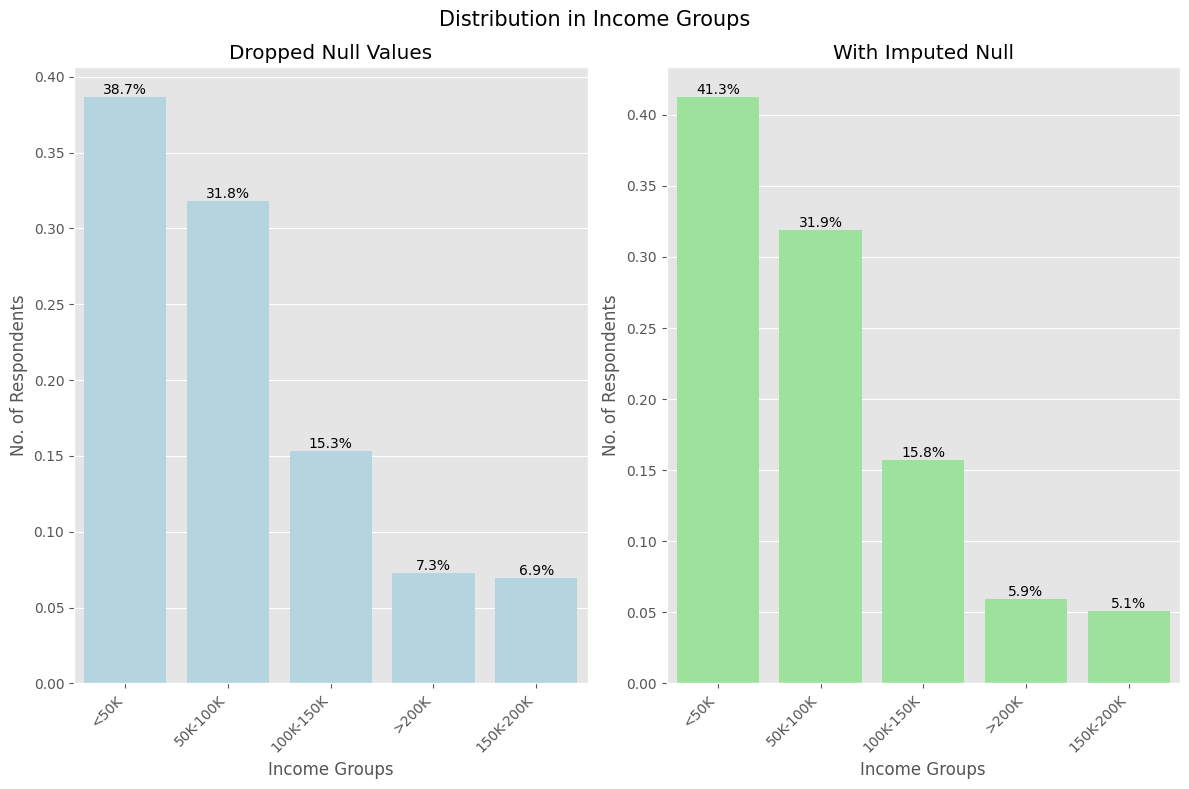

'
     
In this comparison plot, we can see that the distributions between income groups are largely similar. 
      
The proportion change comes from the major group which most are respondents earning below 50K a year and increase the proportions for
      those earning 150K-200K and more than 200K.



      
      
      


In [ ]:
# Comparisons of dropping all null values vs imputed null values in Income Groups

# set figure size
fig, axes = plt.subplots(1,2, figsize=(12,8))

# value counts for income groups dropped null values
income_dropped = no_null_df['income_groups'].value_counts(normalize=True)

# plot dropped null values
income_dropped_plot = sns.barplot(x = income_dropped.index, y = income_dropped.values, color = 'lightblue', ax=axes[0])

# set plot info
axes[0].set_title('Dropped Null Values')
axes[0].set_xlabel('Income Groups')
axes[0].set_ylabel('No. of Respondents')
axes[0].set_xticks(range(len(income_dropped.index)))
axes[0].set_xticklabels(income_dropped.index, rotation=45, ha='right')

# Annotate bar values
for bar in income_dropped_plot.patches:
    axes[0].annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

##########################################################################################


# value counts for income groups with imputed null values
income_null = imp_df['income_groups'].value_counts(normalize=True)


# plot with null values
income_null_plot = sns.barplot(x = income_null.index, y = income_null.values, color = 'lightgreen', ax= axes[1])
axes[1].set_title('With Imputed Null')
axes[1].set_xlabel('Income Groups')
axes[1].set_ylabel('No. of Respondents')
axes[1].set_xticks(range(len(income_null.index)))
axes[1].set_xticklabels(income_null.index, rotation=45, ha='right')


# Annotate bar values
for bar in income_null_plot.patches:
    axes[1].annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.suptitle('Distribution in Income Groups', fontsize = 15)
plt.tight_layout()

plt.show()

print(f''''

In this comparison plot, we can see that the distributions between income groups are largely similar.

The proportion change comes from the major group which most are respondents earning below 50K a year and increase the proportions for
      those earning 150K-200K and more than 200K.





      ''')

#### 2C.3.2 Binge Drinkers

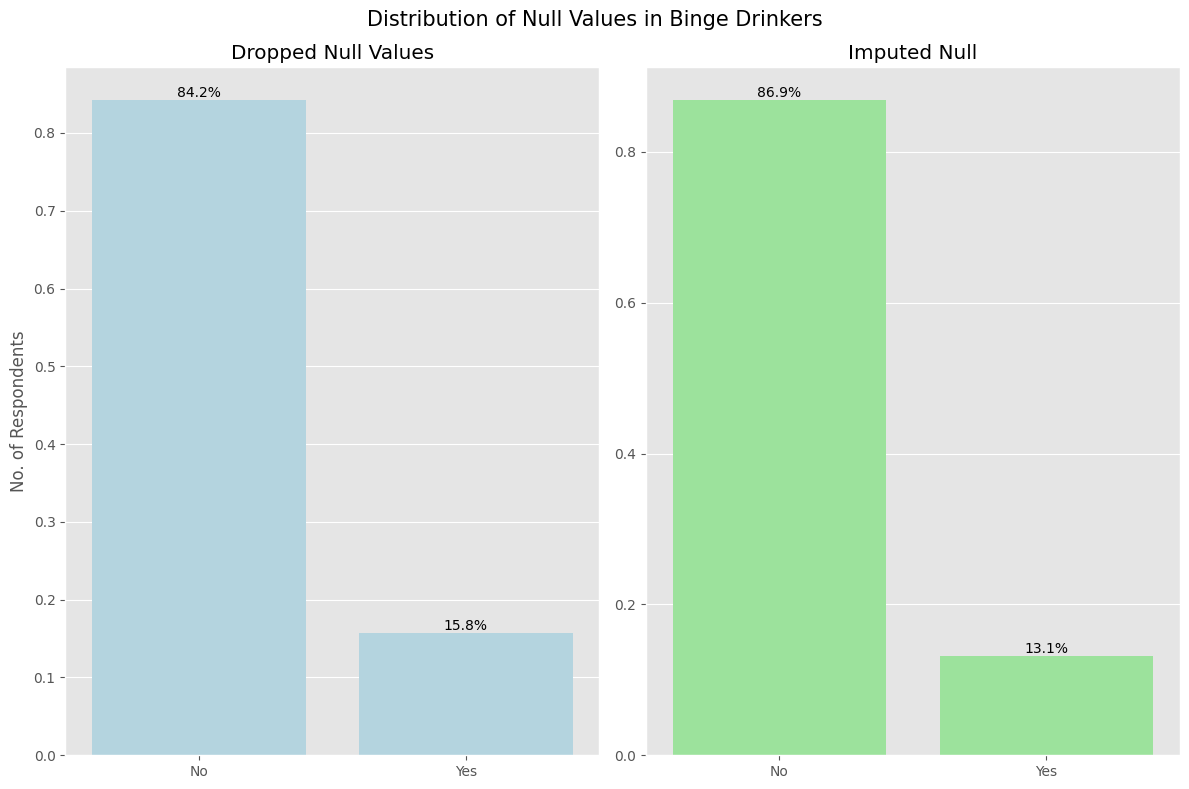

'
     
In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions for 'Yes' and 'No'..



      
      
      


In [ ]:
# Comparisons of dropping all null values vs keeping null values in Binge Drinkers

# set figure size
fig, axes = plt.subplots(1,2, figsize=(12,8))

# value counts for dropped null values
binge_drinker_dropped = no_null_df['binge_drinker'].value_counts(normalize=True)

# plot dropped null values
binge_drinker_dropped_plot = sns.barplot(x = binge_drinker_dropped.index, y = binge_drinker_dropped.values, color = 'lightblue', ax=axes[0])

# set plot info
axes[0].set_title('Dropped Null Values')
axes[0].set_xlabel('')
axes[0].set_ylabel('No. of Respondents')
axes[0].set_xticks(range(len(binge_drinker_dropped.index)))
axes[0].set_xticklabels(binge_drinker_dropped.index)

# Annotate bar values
for bar in binge_drinker_dropped_plot.patches:
    axes[0].annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

##########################################################################################


# value counts for Binge Drinkers WITH null values
binge_drinkers_null = imp_df['binge_drinker'].value_counts(normalize=True)


# plot with null values
binge_drinkers_null_plot = sns.barplot(x = binge_drinkers_null.index, y = binge_drinkers_null.values, color = 'lightgreen', ax= axes[1])
axes[1].set_title('Imputed Null')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticks(range(len(binge_drinkers_null.index)))
axes[1].set_xticklabels(binge_drinkers_null.index)


# Annotate bar values
for bar in binge_drinkers_null_plot.patches:
    axes[1].annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.suptitle('Distribution of Null Values in Binge Drinkers', fontsize = 15)
plt.tight_layout()

plt.show()

print(f''''

In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions for 'Yes' and 'No'..

      ''')

#### 2C.3.3 Heavy Drinkers

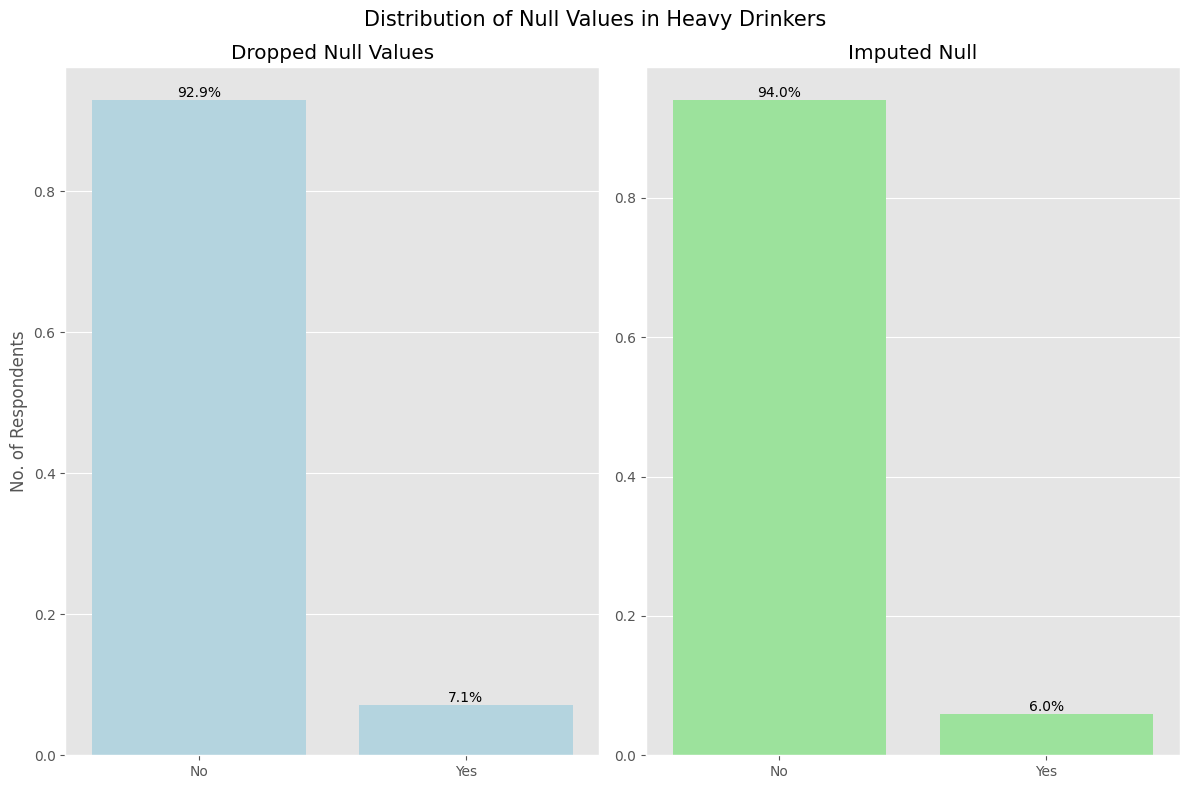

'
     
In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions for 'Yes' and 'No'.



      
      
      


In [ ]:
# Comparisons of dropping all null values vs keeping null values in Heavy Drinkers

# set figure size
fig, axes = plt.subplots(1,2, figsize=(12,8))

# value counts for dropped null values
heavy_drinker_dropped = no_null_df['heavy_drinker'].value_counts(normalize=True)

# plot dropped null values
heavy_drinker_dropped_plot = sns.barplot(x = heavy_drinker_dropped.index, y = heavy_drinker_dropped.values, color = 'lightblue', ax=axes[0])

# set plot info
axes[0].set_title('Dropped Null Values')
axes[0].set_xlabel('')
axes[0].set_ylabel('No. of Respondents')
axes[0].set_xticks(range(len(heavy_drinker_dropped.index)))
axes[0].set_xticklabels(heavy_drinker_dropped.index)

# Annotate bar values
for bar in heavy_drinker_dropped_plot.patches:
    axes[0].annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

##########################################################################################


# value counts for heavy drinkers WITH null values
heavy_drinkers_null = imp_df['heavy_drinker'].value_counts(normalize=True)


# plot with null values
heavy_drinkers_null_plot = sns.barplot(x = heavy_drinkers_null.index, y = heavy_drinkers_null.values, color = 'lightgreen', ax= axes[1])
axes[1].set_title('Imputed Null')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticks(range(len(heavy_drinkers_null.index)))
axes[1].set_xticklabels(heavy_drinkers_null.index)


# Annotate bar values
for bar in heavy_drinkers_null_plot.patches:
    axes[1].annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.suptitle('Distribution of Null Values in Heavy Drinkers', fontsize = 15)
plt.tight_layout()

plt.show()

print(f''''

In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions for 'Yes' and 'No'.





      ''')

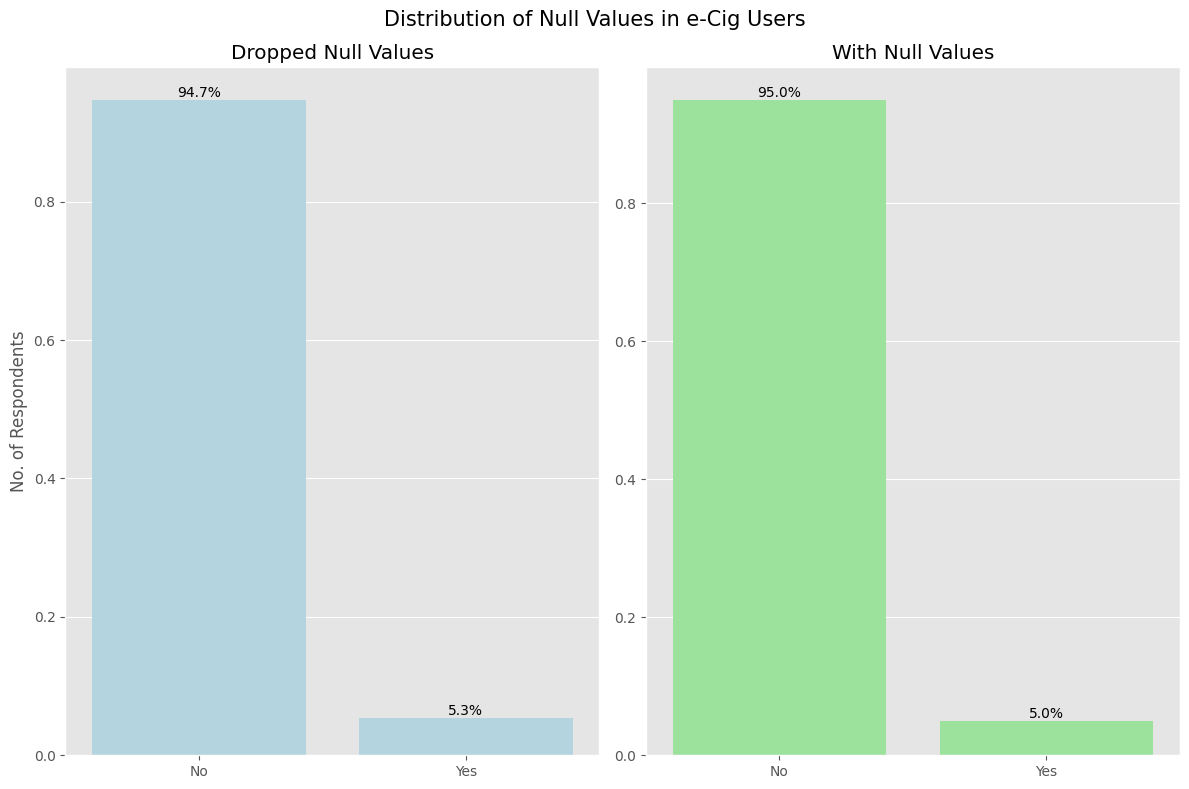

'
     
In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions for 'Yes' and 'No'.



      
      
      


In [ ]:
# Comparisons of dropping all null values vs keeping null values in e-cig smokers

# set figure size
fig, axes = plt.subplots(1,2, figsize=(12,8))

# value counts for e-cig dropped null values
ecig_users_dropped = no_null_df['e_cig_smoker'].value_counts(normalize=True)

# plot dropped null values
ecig_users_dropped_plot = sns.barplot(x = ecig_users_dropped.index, y = ecig_users_dropped.values, color = 'lightblue', ax=axes[0])

# set plot info
axes[0].set_title('Dropped Null Values')
axes[0].set_xlabel('')
axes[0].set_ylabel('No. of Respondents')
axes[0].set_xticks(range(len(ecig_users_dropped.index)))
axes[0].set_xticklabels(ecig_users_dropped.index)

# Annotate bar values
for bar in ecig_users_dropped_plot.patches:
    axes[0].annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

##########################################################################################


# value counts for e-Cig Users WITH null values
ecig_users_null = imp_df['e_cig_smoker'].value_counts(normalize=True)


# plot with null values
ecig_users_null_plot = sns.barplot(x = ecig_users_null.index, y = ecig_users_null.values, color = 'lightgreen', ax= axes[1])
axes[1].set_title('With Null Values')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticks(range(len(ecig_users_null.index)))
axes[1].set_xticklabels(ecig_users_null.index)


# Annotate bar values
for bar in ecig_users_null_plot.patches:
    axes[1].annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.suptitle('Distribution of Null Values in e-Cig Users', fontsize = 15)
plt.tight_layout()

plt.show()

print(f''''

In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions for 'Yes' and 'No'.

      ''')

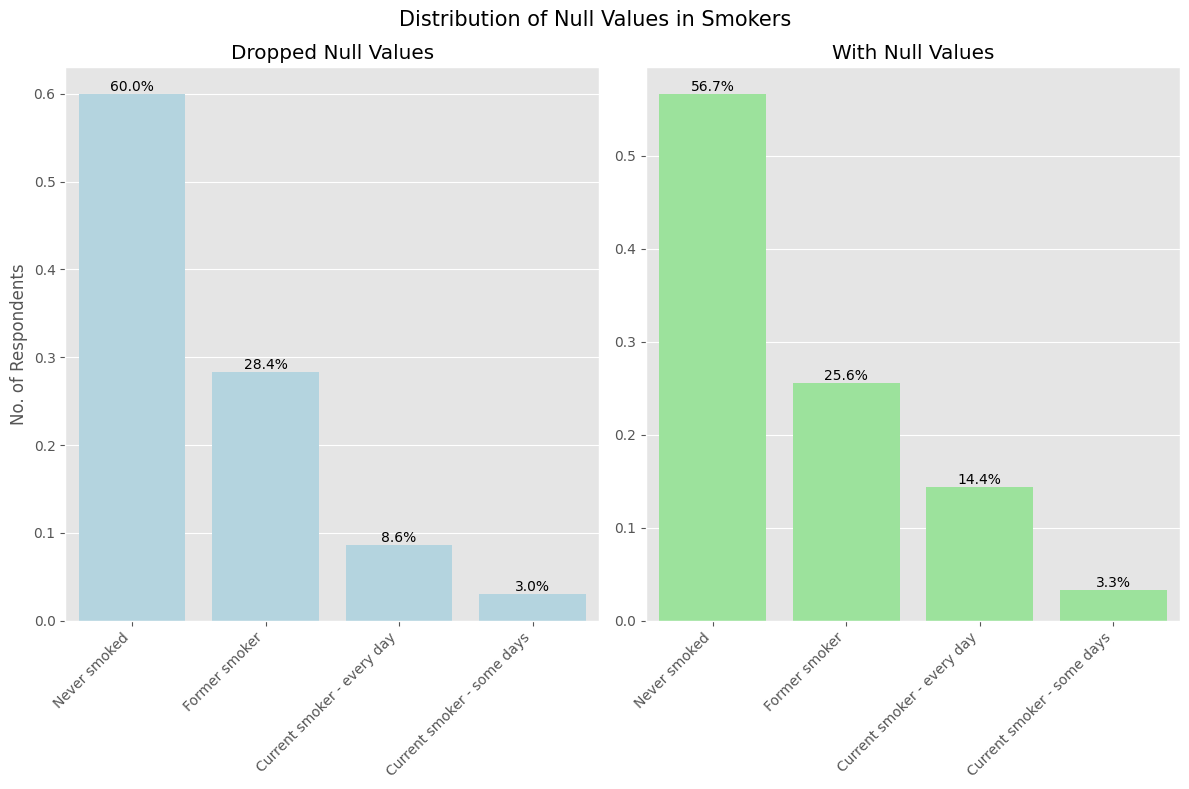

'
     
In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions.
         - The biggest group consistently comprised of more non-smokers
         - The second biggest group are those who had quit smoking
         - The third biggest group are those that are current smokers who are smoking everyday
         - The last group are smokers who smokes every other day
      
      


In [ ]:
# Comparisons of dropping all null values vs keeping null values in smoker status

# set figure size
fig, axes = plt.subplots(1,2, figsize=(12,8))

# value counts for smoker status dropped null values
smoker_status_dropped = no_null_df['smoker_status'].value_counts(normalize=True)

# plot dropped null values
smoker_status_dropped_plot = sns.barplot(x = smoker_status_dropped.index, y = smoker_status_dropped.values, color = 'lightblue', ax=axes[0])

# set plot info
axes[0].set_title('Dropped Null Values')
axes[0].set_xlabel('')
axes[0].set_ylabel('No. of Respondents')
axes[0].set_xticks(range(len(smoker_status_dropped.index)))
axes[0].set_xticklabels(smoker_status_dropped.index, rotation = 45, ha = 'right')

# Annotate bar values
for bar in smoker_status_dropped_plot.patches:
    axes[0].annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

##########################################################################################


# value counts for e-Cig Users WITH null values
smoker_status_null = imp_df['smoker_status'].value_counts(normalize=True)


# plot with null values
smoker_status_null_plot = sns.barplot(x = smoker_status_null.index, y = smoker_status_null.values, color = 'lightgreen', ax= axes[1])
axes[1].set_title('With Null Values')
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticks(range(len(smoker_status_null.index)))
axes[1].set_xticklabels(smoker_status_null.index, rotation = 45, ha = 'right')


# Annotate bar values
for bar in smoker_status_null_plot.patches:
    axes[1].annotate(format(bar.get_height(), '.1%'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom')

plt.suptitle('Distribution of Null Values in Smokers', fontsize = 15)
plt.tight_layout()

plt.show()

print(f''''

In this comparison plot, we can see that the distributions between the 2 plots are largely similar in distributions.
         - There is a decrease in proportion for those who never smoked and former smokers when the null values were imputed
         - The largest increase comes from smokers who are smoking everyday and smokers who smoke every other day.

Considering that there might be a large number of respondents who have missing values in this variable, and how the imputer works,
      this distribution might be due to other factors that a non-smoker might posses that coincides with smoker that cause an increased
      proportions for those who are smoking everday.

      ''')

## 2C.4 Key Takeaways

As the distributions between the datasets are largely similar, we will use the dataset with the imputed null values to run the model.

Before we proceed with the modeling of our dataset, let's summarize the key steps undertaken in this notebook to prepare our data:

* Mapping of Categorical Variables
  - The initial mapping of categorical variables was aligned with the original dataset configuration. Specifically, our target variable `chd_mi` was originally mapped as:
    - `1`: Reported having MI or CHD
    - `2`: Not reported as having MI or CHD

  - For clarity and ease of analysis, we remapped these categories to:
    - `0`: Not reported as having MI or CHD
    - `1`: Reported having MI or CHD

  This remapping rectifies potential confusion and aligns the labels more intuitively, facilitating accurate model predictions.


* Removing Outliers:
  - From our analyses in Notebook 3.1, certain outliers were identified but deemed to have minimal impact on the overall dataset. Examples include:
    - Individuals who have smoked for at least 80 years.
    - Individuals who consume at least 8 packs of cigarettes per day.

  Although these cases are extreme, they represent unique data points that may not significantly alter the general findings but could skew specific analyses. Hence, the decision to remove such outliers was a carefully considered.


* Imputation of Null Values:
  - We encountered substantial amounts of missing data in several key variables, including income, binge_drinker, heavy_drinker, e_cig_smoker, and smoker_status.
  - An analysis comparing the effects of dropping rows with missing values versus imputing them highlighted a common issue in healthcare datasets—high prevalence of null values.
  - The approach to managing missing data is critical as it affects both the integrity and the interpretability of the analytical outcomes. While simple exclusion of missing data is straightforward, it risks losing valuable insights. Conversely, sophisticated imputation techniques, which estimate missing values based on existing data patterns and domain knowledge, can preserve these insights but must be applied judiciously to avoid introducing bias. This process involves careful consideration of the methods used for imputation and their implications on the study's validity and reliability.

Overall, the preprocessing steps are designed to ensure that the data fed into the model is as accurate and representative as possible, setting the stage for robust data modeling, which will be detailed in the next notebook [3. Supervised Learning](03_Modeling.ipynb) . These efforts are crucial for achieving reliable predictive performance in subsequent analyses.

